In [1]:
from PIL import Image
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import os

2025-04-02 19:37:44.043825: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
path_to_dataset = '../../FlowersDataset/dataset_3rd_iteration/'

if not os.path.isdir(path_to_dataset):
    print(f'{path_to_dataset} is not a dir')

In [4]:
import imghdr

/var/folders/7j/_p9t5tjd6cv81x2zrk834f_40000gn/T/ipykernel_20999/336752527.py:1: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
tip = imghdr.what('../../FlowersDataset/dataset_3rd_iteration/Train/lavender/lavender_796657.jpeg')
tip

'jpeg'

In [6]:
os.listdir(path_to_dataset)

['Validate', 'Test', 'Train']

In [7]:
os.listdir(os.path.join(path_to_dataset,'Test'))

['peony', 'lavender', 'daisy', 'rose', 'dandelion']

In [8]:
os.listdir(os.path.join(path_to_dataset,'Test','daisy'))

['daisy_8053679.jpeg',
 'daisy_7663211.jpeg',
 'daisy_818018.jpeg',
 'daisy_7395425.jpeg',
 'daisy_7663246.jpeg',
 'daisy_7176393.jpeg',
 'daisy_7663207.jpeg',
 'daisy_7881282.jpeg',
 'daisy_7085610.jpeg',
 'daisy_8146938.jpeg',
 'daisy_73812.jpeg',
 'daisy_7663174.jpeg',
 'daisy_7858791.jpeg',
 'daisy_8066582.jpeg',
 'daisy_724646.jpeg',
 'daisy_7388762.jpeg',
 'daisy_8067983.jpeg',
 'daisy_8468848.jpeg',
 'daisy_7463845.jpeg',
 'daisy_7559270.jpeg',
 'daisy_8053681.jpeg',
 'daisy_8261203.png',
 'daisy_7626821.jpeg',
 'daisy_6984041.jpeg',
 'daisy_8102082.jpeg',
 'daisy_7790583.jpeg',
 'daisy_7728384.jpeg',
 'daisy_7255615.jpeg',
 'daisy_773260.jpeg',
 'daisy_7814451.jpeg',
 'daisy_8355567.jpeg',
 'daisy_819320.jpeg',
 'daisy_7663169.jpeg',
 'daisy_7176394.jpeg',
 'daisy_7877922.jpeg',
 'daisy_6913396.jpeg',
 'daisy_7663187.jpeg',
 'daisy_8261504.png',
 'daisy_6925158.jpeg',
 'daisy_7815650.jpeg',
 'daisy_6920395.jpeg',
 'daisy_8357449.jpeg',
 'daisy_7498827.jpeg',
 'daisy_7663164.jpe

In [9]:
image_exts = ['jpeg', 'jpg', 'png']

In [11]:
TRAIN_DIR = '../../FlowersDataset/dataset_3rd_iteration/Train'
TEST_DIR = '../../FlowersDataset/dataset_3rd_iteration/Test'
VAL_DIR = '../../FlowersDataset/dataset_3rd_iteration/Validate'

if not os.path.isdir(TRAIN_DIR):
  print('not a dir')

if not os.path.isdir(TEST_DIR):
  print('not a dir')

if not os.path.isdir(VAL_DIR):
  print('not a dir')

In [12]:
train_datagen = ImageDataGenerator(
                    rescale = 1. / 255,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)

train_set = train_datagen.flow_from_directory(TRAIN_DIR, target_size=(224,224), batch_size=32, class_mode='categorical')

val_datagen = ImageDataGenerator(rescale = 1. / 255)

val_set = train_datagen.flow_from_directory(VAL_DIR, target_size=(224,224), batch_size=32, class_mode='categorical')

Found 295 images belonging to 5 classes.
Found 2270 images belonging to 5 classes.


In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))
])

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2) ))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(filters=96, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2) ))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Conv2D(filters=96, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2) ))
model.add(tf.keras.layers.Dropout(0.5))

# Flatten

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=512, activation='relu'))

# Output

model.add(tf.keras.layers.Dense(units=5, activation='softmax'))


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 28, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,634,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,794,693 (37.36 MB)

 Trainable params: 9,794,693 (37.36 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from PIL import Image

image = Image.open('../../FlowersDataset/dataset_3rd_iteration/Train/lavender/lavender_796657.jpeg')
image.show()

In [17]:
import sys
print(sys.executable)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_set, validation_data=val_set, batch_size=32, epochs=20)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

print(acc)
print(val_acc)

/Users/user/Documents/GitHub/FlowerModels/venv/bin/python
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.1823 - loss: 4.8691 

/Users/user/Documents/GitHub/FlowerModels/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 824s 91s/step - accuracy: 0.1867 - loss: 4.7005 - val_accuracy: 0.2304 - val_loss: 1.6093
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 781s 85s/step - accuracy: 0.2509 - loss: 1.6108 - val_accuracy: 0.2291 - val_loss: 1.6086
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 820s 90s/step - accuracy: 0.2588 - loss: 1.6062 - val_accuracy: 0.3568 - val_loss: 1.6036
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 772s 85s/step - accuracy: 0.3057 - loss: 1.5922 - val_accuracy: 0.3361 - val_loss: 1.5859
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 768s 84s/step - accuracy: 0.3447 - loss: 1.6174 - val_accuracy: 0.3648 - val_loss: 1.5465
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 767s 84s/step - accuracy: 0.3585 - loss: 1.5640 - val_accuracy: 0.4159 - val_loss: 1.5040
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 768s 84s/step - accuracy: 0.4777 - loss: 1.4380 - val_accuracy: 0.3621 - val_loss: 1.4448
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 769s 84s/step - accuracy: 0.3703 - loss: 1.4682 - val_accuracy: 0.3678 - val_

In [18]:
save_path = os.getcwd()
if not os.path.isdir(save_path):
    print('not good')
else:
    print(f'path{save_path}')
print(os.path.join(save_path,'flowers.keras'))

path/Users/user/Documents/GitHub/FlowerModels/models
/Users/user/Documents/GitHub/FlowerModels/models/flowers.keras


In [19]:
path = os.path.join(save_path, '2nd_it_flowers.keras')
print(path)
model.save(path)

/Users/user/Documents/GitHub/FlowerModels/models/2nd_it_flowers.keras


In [20]:
epochs_range = range(20)

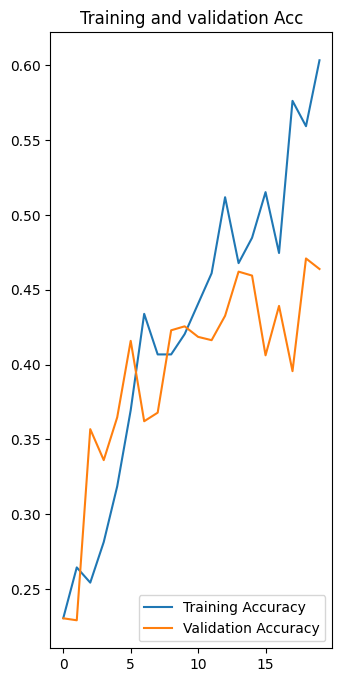

In [21]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation Acc')
plt.show()

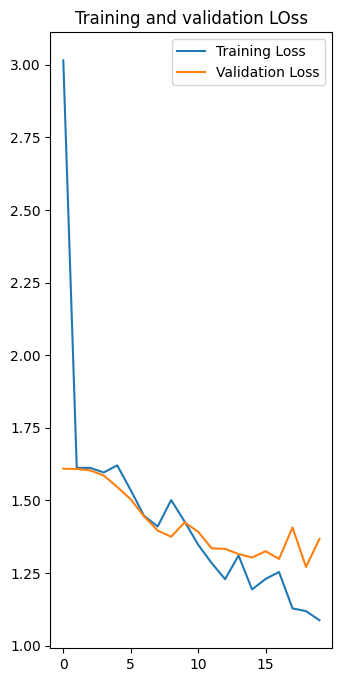

In [22]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and validation LOss')
plt.show()

In [26]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
    '../../FlowersDataset/dataset_3rd_iteration/Test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 480 images belonging to 5 classes.


In [28]:
import numpy as np

y_pred = model.predict(test_set)

y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_set.classes

class_indices = test_set.class_indices
print("Mapare clase:", class_indices)


15/15 ━━━━━━━━━━━━━━━━━━━━ 132s 9s/step
Mapare clase: {'daisy': 0, 'dandelion': 1, 'lavender': 2, 'peony': 3, 'rose': 4}


In [29]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

precision = Precision()
recall = Recall()
accuracy = CategoricalAccuracy()

from tensorflow.keras.utils import to_categorical
y_true_one_hot = to_categorical(y_true, num_classes=5)

precision.update_state(y_true_one_hot, y_pred)
recall.update_state(y_true_one_hot, y_pred)
accuracy.update_state(y_true_one_hot, y_pred)

print(f"Precision: {precision.result().numpy():.4f}")
print(f"Recall: {recall.result().numpy():.4f}")
print(f"Accuracy: {accuracy.result().numpy():.4f}")


Precision: 0.5500
Recall: 0.2062
Accuracy: 0.4125


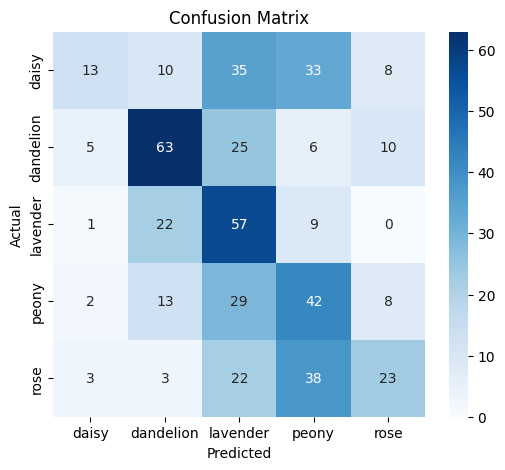

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_indices.keys(), yticklabels=class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [33]:
import cv2

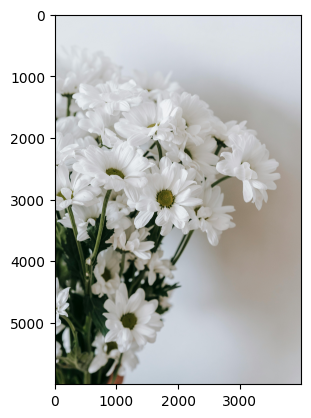

In [37]:
path_to_image = '../../FlowersDataset/dataset_3rd_iteration/Test/daisy/daisy_6913066.jpeg'

img = cv2.imread(path_to_image)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [38]:
resize = tf.image.resize(img,(224,224))

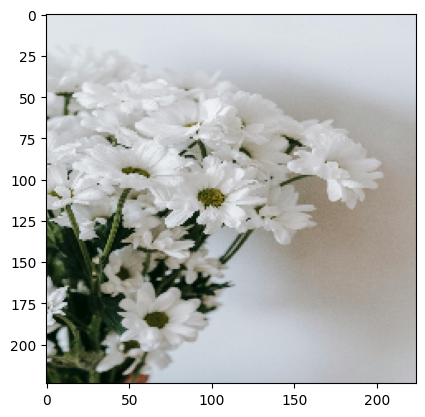

In [41]:
plt.imshow(cv2.cvtColor(resize.numpy().astype('uint8'), cv2.COLOR_BGR2RGB))
plt.show()

In [42]:
np.expand_dims(resize, 0).shape

(1, 224, 224, 3)

In [44]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


array([[0.06711693, 0.10525823, 0.4157791 , 0.2500122 , 0.16183357]],
      dtype=float32)

In [45]:
predicted_class_index = np.argmax(yhat)
print("Predicted class index:", predicted_class_index) 

Predicted class index: 2


Modelul prezice 'lavender' cand de fapt este daisy

### Observatii
- Antrenarea a durat in jur de 260 de minute 
- Acuratetea este slaba spre ok, trebuie imbunatatit neaparat
- Multe erori de clasificare (clasifica gresit la greu)

### De facut
- Modificat datasetul
- Modificat modelul